# Projeto de análise de dados do Titanic
O objetivo deste projeto é analisar os dados do Titanic e tentar responder algumas perguntas sobre o naufrágio do navio. Para isso, utilizaremos a biblioteca Pandas para manipulação dos dados e a biblioteca Matplotlib para visualização dos dados. Para modelagem dos dados, utilizaremos a biblioteca Scikit-Learn.

In [37]:
import pandas as pd

In [38]:
# criando uma função para preparar os dados
def prepare_data(df):
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    title_age_mean = df.groupby('Title')['Age'].mean()
    title_age_mean = title_age_mean.to_dict()
    df['Age'] = df.apply(lambda x: title_age_mean[x['Title']] if pd.isnull(x['Age']) else x['Age'], axis=1)
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    df['Fare'] = df.apply(lambda x: 'gt_100' if x['Fare'] > 100 else 'bt_30_100' if x['Fare'] > 30 else 'lt_30', axis=1)
    df['Age'] = df.apply(lambda x: 'gt_50' if x['Age'] > 50 else 'bt_20_50' if x['Age'] > 20 else 'lt_20', axis=1)
    one_hot_encoded_pclass = pd.get_dummies(df['Pclass']).astype(int)
    one_hot_encoded_pclass.columns = ['Pclass_' + str(col) for col in one_hot_encoded_pclass.columns]
    one_hot_encoded_sex = pd.get_dummies(df['Sex']).astype(int)
    one_hot_encoded_age  = pd.get_dummies(df['Age']).astype(int)
    one_hot_encoded_fare = pd.get_dummies(df['Fare']).astype(int)
    one_hot_encoded_embarked = pd.get_dummies(df['Embarked']).astype(int)
    df = pd.concat([df, one_hot_encoded_pclass, one_hot_encoded_age, one_hot_encoded_sex,one_hot_encoded_fare, one_hot_encoded_embarked], axis=1)
    df.drop(['Cabin', 'Name', 'Ticket', 'SibSp', 'Parch', 'PassengerId'], axis=1, inplace=True)
    df.drop(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title'], axis=1, inplace=True)
    return df

In [39]:
def grafbarscores(*scores):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import warnings
    warnings.filterwarnings('ignore')
    df_scores = pd.DataFrame(columns=['Model', 'Score'])
    for score in scores:
        new_row = {'Model': score[0], 'Score': score[1]}
        df_scores = df_scores.append(new_row, ignore_index=True)
    fig, ax = plt.subplots()
    sns.barplot(x='Score', y='Model', data=df_scores.sort_values(by='Score', ascending=False), ax=ax)
    ax.set_xlim([0, 1])
    for p in ax.patches:
        ax.annotate("%.4f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()+0.65), xytext=(5, 10), textcoords='offset points')
    plt.xlabel('Score (accuracy)')
    plt.ylabel('Model')
    plt.title('Machine Learning Model Scores')
    plt.show()

In [40]:
df_train = pd.read_csv('./data/raw/train.csv')
df_train.to_csv('./data/processed/first_train.csv', index=False)
df_test = pd.read_csv('./data/raw/test.csv')
df_test.to_csv('./data/processed/first_test.csv', index=False)


Vamos separar a coluna nome para pegar os títulos de cada passageiro e analisar se existe alguma relação entre o título e a sobrevivência do passageiro.

In [41]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Verificar se há dados faltantes

In [42]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [43]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Remover as colunas que não serão utilizadas

<Axes: >

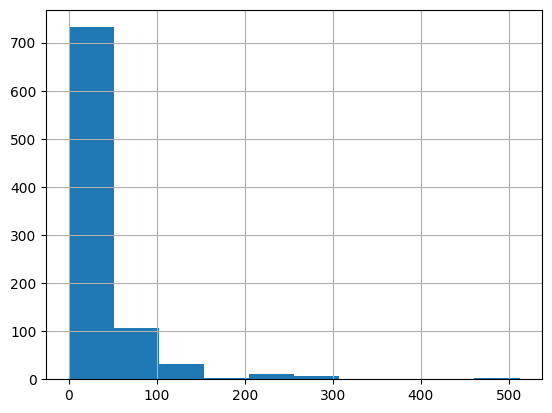

In [44]:
# Plotando um histograma do Fare
df_train['Fare'].hist()

<Axes: >

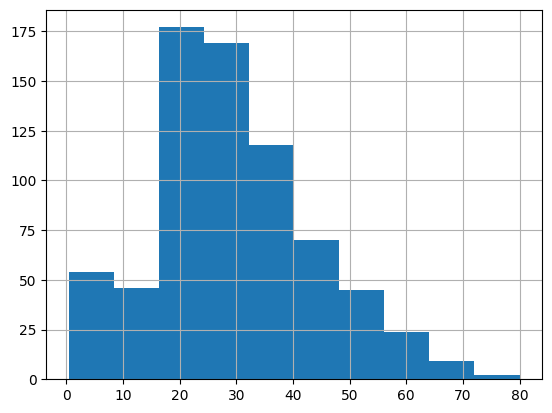

In [45]:
# Plotando um histograma do Age
df_train['Age'].hist()

In [46]:
df_train = prepare_data(df_train)
X_test = prepare_data(df_test)


In [47]:
df_train.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,bt_20_50,gt_50,lt_20,female,male,bt_30_100,gt_100,lt_30,C,Q,S
0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1
1,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0
2,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1
3,1,1,0,0,1,0,0,1,0,1,0,0,0,0,1
4,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1


In [48]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,bt_20_50,0,0,330911,lt_30,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,bt_20_50,1,0,363272,lt_30,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,gt_50,0,0,240276,lt_30,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,bt_20_50,0,0,315154,lt_30,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,bt_20_50,1,1,3101298,lt_30,NaN,S,Mrs


In [49]:
X_train = df_train.drop('Survived', axis=1)
y_train = df_train['Survived']


In [50]:
# Definir o modelo de classificação que será utilizado: Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=1)

In [51]:
# Verificando a acurácia do modelo
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_train)
accuracy_score(y_train, y_pred)


0.8148148148148148

In [52]:
# Verificar o score do modelo
rf_score = model.score(X_train, y_train)


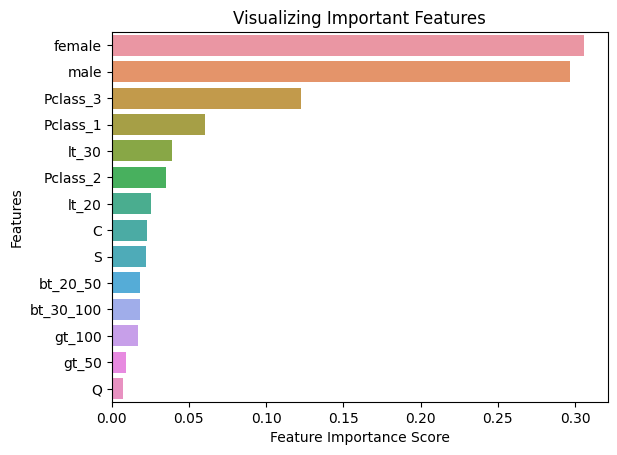

In [53]:
# Verificando a importância de cada feature colocando o nome e em um gráfico de barras
import matplotlib.pyplot as plt
import seaborn as sns
feature_imp = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()


In [54]:
# gerar o arquivo de submissão
y_pred = model.predict(X_test)
submission = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_pred})
submission.to_csv('./data/submission/first_forest.csv', index=False)

In [55]:
# Definir o modelo de classificação que será utilizado: Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5, random_state=1)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=1)

In [56]:
# verificando a acurácia do modelo
y_pred = model.predict(X_train)
accuracy_score(y_train, y_pred)

0.8170594837261503

In [57]:
# Verificar o score do modelo
dtree_score = model.score(X_train, y_train)

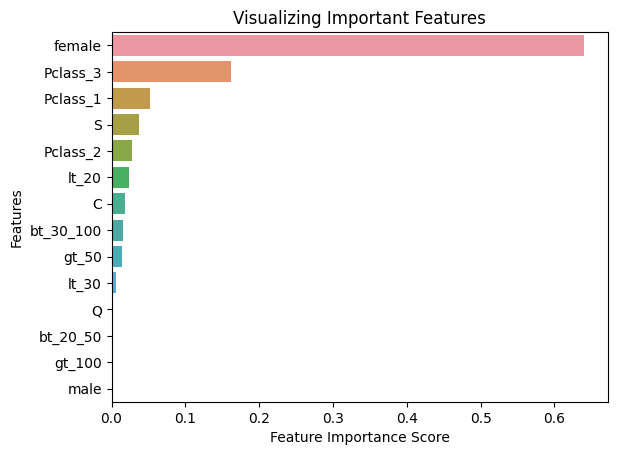

In [58]:
# Verificando a importância de cada feature colocando o nome e em um gráfico de barras
import matplotlib.pyplot as plt
import seaborn as sns
feature_imp = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()


In [59]:
# gerar o arquivo de submissão
y_pred = model.predict(X_test)
submission = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_pred})
submission.to_csv('./data/submission/first_decision_tree.csv', index=False)


In [60]:
# Usar o modelo de classificação LogisticRegression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=1)
model.fit(X_train, y_train)


LogisticRegression(random_state=1)

In [61]:
lr_score = model.score(X_train, y_train)

In [62]:
# submeter o arquivo de predição
y_pred = model.predict(X_test)
submission = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_pred})  
submission.to_csv('./data/submission/first_logistic_regression.csv', index=False)

In [63]:
# Usar o modelo de classificação KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)


KNeighborsClassifier()

In [64]:
kn_score = model.score(X_train, y_train)

In [65]:
# submeter o arquivo de predição
y_pred = model.predict(X_test)
submission = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_pred})  
submission.to_csv('./data/submission/first_knclassifier.csv', index=False)

In [66]:
# Usar o modelo de classificação SVC
from sklearn.svm import SVC
model = SVC(random_state=1)
model.fit(X_train, y_train)

SVC(random_state=1)

In [67]:
svm_score = model.score(X_train, y_train)

In [68]:
# criar um dataframe com os resultados
df_scores = pd.DataFrame({'Model': ['Random Forest', 'Decision Tree', 'Logistic Regression', 'KNeighborsClassifier', 'SVC'],
                          'Score': [rf_score, dtree_score, lr_score, kn_score, svm_score]})
df_scores.sort_values(by='Score', ascending=False)


,Model,Score
1,Decision Tree,0.817059
0,Random Forest,0.814815
4,SVC,0.814815
3,KNeighborsClassifier,0.805836
2,Logistic Regression,0.804714


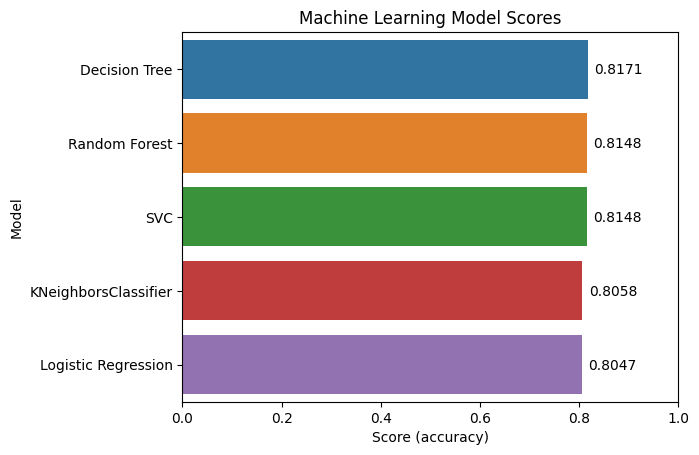

In [69]:
grafbarscores(['Random Forest', rf_score], ['Decision Tree', dtree_score], ['Logistic Regression', lr_score], ['KNeighborsClassifier', kn_score], ['SVC', svm_score])
